<a href="https://colab.research.google.com/github/daregioia/Detergent-Pricing-Demand-Analysis-Marketing-Analytics/blob/main/Marketing_analytics_Detergent_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Description

## a)

In [ ]:
import pandas as pd

file_path = "/content/Detergent.csv"
df = pd.read_csv(file_path)
print(df.head())
print()
print()


df['revenue_tide128'] = df['q_tide128'] * df['p_tide128']
df['revenue_tide64'] = df['q_tide64'] * df['p_tide64']
df['revenue_wisk64'] = df['q_wisk64'] * df['p_wisk64']

# total revenue
total_revenue = df[['revenue_tide128', 'revenue_tide64', 'revenue_wisk64']].sum().sum()

# revenue market shares
revenue_sums = df[['revenue_tide128', 'revenue_tide64', 'revenue_wisk64']].sum()
market_shares = (revenue_sums / total_revenue) * 100

# summary table
price_summary_df = pd.DataFrame({
    'Product': ['Tide 128oz', 'Tide 64oz', 'Wisk 64oz'],
    'Mean Price': [df['p_tide128'].mean(), df['p_tide64'].mean(), df['p_wisk64'].mean()],
    'Median Price': [df['p_tide128'].median(), df['p_tide64'].median(), df['p_wisk64'].median()],
    'Std Dev': [df['p_tide128'].std(), df['p_tide64'].std(), df['p_wisk64'].std()],
    'Revenue Market Share (%)': market_shares.values
})

print("Price Summary and Market Share:")
print(price_summary_df)


   Unnamed: 0  store  week       acv  promoflag  q_tide128  p_tide128  \
0           1      2     1  13828.87          1         34   8.701765   
1           2      2     2  13828.87          0         46   8.670435   
2           3      2     3  13828.87          0         43   8.720233   
3           4      2     4  13828.87          0        165   8.738484   
4           5      2     5  13828.87          1         77   6.990000   

   q_tide64  p_tide64  q_wisk64  p_wisk64  
0        26  5.111538        71      3.29  
1        42  5.020476        16      4.19  
2        48  5.049375        35      4.19  
3        33  5.056667        26      4.19  
4        35  5.116857        33      4.19  


Price Summary and Market Share:
      Product  Mean Price  Median Price   Std Dev  Revenue Market Share (%)
0  Tide 128oz    8.363219      8.476207  0.760049                 56.856988
1   Tide 64oz    4.375451      4.419412  0.404608                 26.336469
2   Wisk 64oz    4.071963      4.19

Tide 128 oz holds the largest **market share** (56.87%), followed by Tide 64 oz (26.33%) and Wisk 64 oz (16.80%).

The **price analysis** shows that Tide 128 oz has the highest average price (8.36), while Wisk 64 oz is the cheapest (4.07). Tide 128 oz also has the most price variation, indicating that its price fluctuates the most across stores and over time.



## b)

In [ ]:
# Create new variables for price gaps
df['price_gap_tide128_tide64'] = df['p_tide128'] - df['p_tide64']
df['price_gap_tide64_wisk64'] = df['p_tide64'] - df['p_wisk64']

# Compute summary statistics for the new price gap variables
price_gap_summary = pd.DataFrame({
    "Variable": ["Price Gap Tide 128oz - Tide 64oz", "Price Gap Tide 64oz - Wisk 64oz"],
    "Mean": [df['price_gap_tide128_tide64'].mean(), df['price_gap_tide64_wisk64'].mean()],
    "Median": [df['price_gap_tide128_tide64'].median(), df['price_gap_tide64_wisk64'].median()],
    "Standard Deviation": [df['price_gap_tide128_tide64'].std(), df['price_gap_tide64_wisk64'].std()]
})

# Display the table with summary statistics
print(price_gap_summary)


                           Variable      Mean    Median  Standard Deviation
0  Price Gap Tide 128oz - Tide 64oz  3.987768  4.094000            0.870574
1   Price Gap Tide 64oz - Wisk 64oz  0.303489  0.260714            0.585964


The **pairwise price gap analysis** reveals that the price difference between Tide 128oz and Tide 64oz is, on average, the largest of all product pairs, across stores and over time. This average difference amounts to approximately $4 and exhibits the highest variation among all product-pair price gaps across store-weeks

## c)

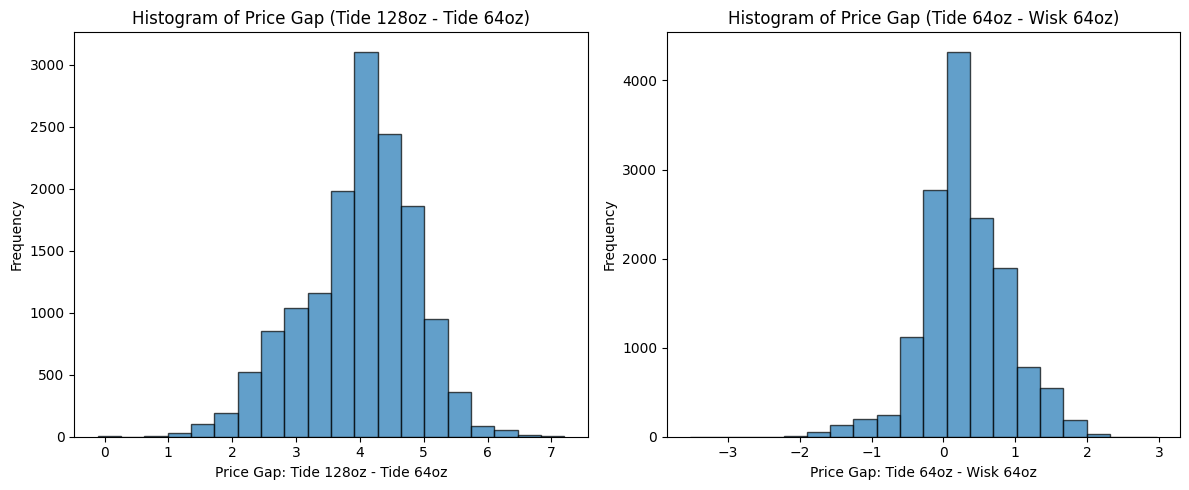

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for the price gap variables
plt.figure(figsize=(12, 5))

# Histogram for Tide 128oz - Tide 64oz
plt.subplot(1, 2, 1)
plt.hist(df["p_tide128"] - df["p_tide64"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Price Gap: Tide 128oz - Tide 64oz")
plt.ylabel("Frequency")
plt.title("Histogram of Price Gap (Tide 128oz - Tide 64oz)")

# Histogram for Tide 64oz - Wisk 64oz
plt.subplot(1, 2, 2)
plt.hist(df["p_tide64"] - df["p_wisk64"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Price Gap: Tide 64oz - Wisk 64oz")
plt.ylabel("Frequency")
plt.title("Histogram of Price Gap (Tide 64oz - Wisk 64oz)")

# Show graphs
plt.tight_layout()
plt.show()


The histograms illustrate the **distribution of price gaps** between the detergent products across store-weeks.

- **Tide 128oz vs. Tide 64oz**: The price gap is centered around 4, indicating a consistent **premium for the larger size** - even the lowest values are almost never null or negative. The distribution is slightly right-skewed, suggesting some store-weeks have an even larger price gap.

- **Tide 64oz vs. Wisk 64oz**: The price gap is centered around 0, meaning these two products are **close competitors in pricing**. The distribution includes both negative and positive values, indicating that in some store-weeks, Tide 64oz is more expensive, while in others, Wisk 64oz is more expensive.

These results align with the summary statistics, confirming that Tide 128oz consistently commands a price premium, while Tide 64oz and Wisk 64oz compete more closely in price.

## d)

The price gap histograms and summary statistics indicate that there is **significant variation in the price differences across stores and weeks**. The price gap between Tide 128 oz and Tide 64 oz has a higher mean (3.99) and standard deviation (0.87), suggesting that retailers apply noticeable price differences for the larger pack size and the variation of price gaps between the two products is substantial. The price gap between Tide 64 oz and Wisk 64 oz is much smaller (mean: 0.30, std dev: 0.59), indicating closer competition between these two products.

The observed price variation suggests that we have **sufficient data to estimate cross-price elasticities**, especially for the Tide 128oz vs. Tide 64oz price gap. Since cross-price elasticities rely on variations in price relationships across time and stores, the fluctuations in price gaps provide a reasonable basis for estimating how changes in one product’s price impact the demand for another.

#Demand Estimation

## a)

In [ ]:
# Compute sales velocity for Tide 64 oz and Tide 128 oz
df["velocity_tide64"] = df["q_tide64"] / df["acv"]
df["velocity_tide128"] = df["q_tide128"] / df["acv"]

# Compute summary statistics
velocity_summary = df[["velocity_tide64", "velocity_tide128"]].describe()

# Display results
print("Sales Velocity Summary:")
print(velocity_summary)



Sales Velocity Summary:
       velocity_tide64  velocity_tide128
count     14745.000000      14745.000000
mean          0.003865          0.004302
std           0.006681          0.006873
min           0.000046          0.000044
25%           0.001635          0.001682
50%           0.002487          0.002585
75%           0.003612          0.004126
max           0.291872          0.123780


The results show that **Tide 128** oz has a **slightly higher average sales velocity** (0.0043) **than Tide 64 oz** (0.0039), indicating that it sells faster per unit of distribution. However, both products exhibit significant variation in sales velocity across stores and weeks, as seen in their wide standard deviations and range of values. This suggests that factors such as pricing, promotions, and local demand impact sales velocity.

## b)

Since **ACV** is defined as the store revenue from all products sold, and therefore includes sales in all categories, not just the products in the demand model, it **is a good proxy for store size**. **Dividing unit sales by ACV** (All Commodity Volume) helps **standardize sales performance across different stores** by adjusting for variations in store size and distribution level. This ensures that sales comparisons reflect true demand intensity rather than differences in store traffic or availability.

By using sales velocity instead of raw unit sales, we can:

*   Compare performance across stores with varying levels of distribution.
*   Account for distribution gaps, making demand estimates more accurate.
* Improve elasticity estimates, as the dependent variable becomes less biased by differences in store size.

This transformation is particularly useful in demand modeling because it isolates the impact of factors like price changes on sales performance, rather than being influenced by store size or product availability.

## c)

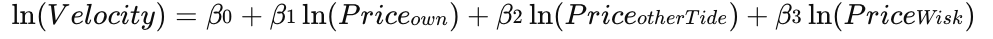

In [ ]:
import numpy as np
import statsmodels.api as sm

# Log-transform velocities and prices (same dataframe 'df' used in your Colab)
df['velocity_tide128'] = df['q_tide128'] / df['acv']
df['velocity_tide64'] = df['q_tide64'] / df['acv']

df['log_velocity_tide128'] = np.log(df['velocity_tide128'] + 1e-8)
df['log_velocity_tide64'] = np.log(df['velocity_tide64'] + 1e-8)

df['log_p_tide128'] = np.log(df['p_tide128'])
df['log_p_tide64'] = np.log(df['p_tide64'])
df['log_p_wisk64'] = np.log(df['p_wisk64'])

# Set up the independent variables (prices) - no time trend for 2c
X_tide128 = df[['log_p_tide128', 'log_p_tide64', 'log_p_wisk64']]
X_tide128 = sm.add_constant(X_tide128)

X_tide64 = df[['log_p_tide128', 'log_p_tide64', 'log_p_wisk64']]
X_tide64 = sm.add_constant(X_tide64)

# Dependent variables (log velocity)
y_tide128 = df['log_velocity_tide128']
y_tide64 = df['log_velocity_tide64']

# Run OLS regressions for both products
model_tide128 = sm.OLS(y_tide128, X_tide128).fit()
model_tide64 = sm.OLS(y_tide64, X_tide64).fit()

# Display summaries (optional - you can comment these out if not needed)
print("Tide 128oz Regression Results (no time trend)")
print(model_tide128.summary())

print("\nTide 64oz Regression Results (no time trend)")
print(model_tide64.summary())

# Extract coefficients if you want to display them directly
print("="*30)
print("\nTide 128oz Coefficients:")
print(model_tide128.params)
print("="*30)
print("\nTide 64oz Coefficients:")
print(model_tide64.params)

Tide 128oz Regression Results (no time trend)
                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.266
Model:                              OLS   Adj. R-squared:                  0.266
Method:                   Least Squares   F-statistic:                     1782.
Date:                  Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                          22:11:26   Log-Likelihood:                -16007.
No. Observations:                 14745   AIC:                         3.202e+04
Df Residuals:                     14741   BIC:                         3.205e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## d)

The demand estimates align with economic expectations:

* **Own-price elasticities** are negative, as expected. Tide 64 oz (-3.75) and Tide 128 oz (-4.60) show high price sensitivity, meaning that their own demand drops significantly when their prices increase. Indeed, a 1% increase in the price of Tide 128oz reduces its velocity (demand adjusted by the shops' sizes) by about 4.6%, while the same increase in the price of Tide 64oz causes a 3.75% decrease in its velocity. These are relatively elastic responses, which are common for consumer packaged goods (CPG) in competitive categories like detergent.
* **Positive cross-price elasticities** confirm **substitution effects** between **Tide 64 oz** and **Tide 128 oz** (1.45 and 0.29, respectively). This suggests that consumers switch between these two pack sizes when prices change, confirming that these products are substitutes within the Tide product line, which suggests a strong degree of **cannibalization within the Tide product line**.
* **Tide 64 oz** and **Wisk 64 oz** have a **negative relationship** (-0.87), indicating Wisk is not a strong competitor to Tide. The negative sign of the coefficient indeed suggests that when Wisk becomes more expensive, Tide 64oz sells less. This is unusual, but could reflect symultaneous promotions or seasonal demand facotrs.
* The magnitude and signs of the elasticities are reasonable, confirming expected consumer behavior.

This analysis supports that Tide sizes are closely competing, while Wisk has a lesser impact on Tide's demand.

# Regression Analysis

## a)

In [ ]:
detergent = pd.read_csv(file_path)

# Calculate velocity for Tide 128oz and 64oz
detergent['velocity_tide128'] = detergent['q_tide128'] / detergent['acv']
detergent['velocity_tide64'] = detergent['q_tide64'] / detergent['acv']

# Log-transform velocities and prices
detergent['log_velocity_tide128'] = np.log(detergent['velocity_tide128'] + 1e-8)
detergent['log_velocity_tide64'] = np.log(detergent['velocity_tide64'] + 1e-8)

detergent['log_p_tide128'] = np.log(detergent['p_tide128'])
detergent['log_p_tide64'] = np.log(detergent['p_tide64'])
detergent['log_p_wisk64'] = np.log(detergent['p_wisk64'])

# Define dependent variables
y_tide128 = detergent["log_velocity_tide128"]
y_tide64 = detergent["log_velocity_tide64"]

# Define independent variables with promo flag and time trend
X_tide128 = detergent[['log_p_tide128', 'log_p_tide64', 'log_p_wisk64', 'promoflag', 'week']]
X_tide128 = sm.add_constant(X_tide128)

X_tide64 = detergent[['log_p_tide128', 'log_p_tide64', 'log_p_wisk64', 'promoflag', 'week']]
X_tide64 = sm.add_constant(X_tide64)

# Run OLS regressions
model_tide128_trend = sm.OLS(y_tide128, X_tide128).fit()
model_tide64_trend = sm.OLS(y_tide64, X_tide64).fit()

# Display regression summaries
print("="*30)
print("Regression Results for Tide 128 oz (Including Time Trend):")
print(model_tide128_trend.summary())
print("="*30)
print("\nRegression Results for Tide 64 oz (Including Time Trend):")
print(model_tide64_trend.summary())

print("="*30)
print("\nTide 128oz Coefficients:")
print(model_tide128_trend.params)
print("="*30)
print("\nTide 64oz Coefficients:")
print(model_tide64_trend.params)


Regression Results for Tide 128 oz (Including Time Trend):
                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.305
Model:                              OLS   Adj. R-squared:                  0.305
Method:                   Least Squares   F-statistic:                     1293.
Date:                  Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                          22:40:36   Log-Likelihood:                -15608.
No. Observations:                 14745   AIC:                         3.123e+04
Df Residuals:                     14739   BIC:                         3.127e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

The regression results confirm expected demand behavior for both Tide 128 oz and Tide 64 oz:

* **Own-price elasticity is strongly negative**, with Tide 128 oz (-4.77) and Tide 64 oz (-3.73), indicating that both products are highly price elastic—price increases significantly reduce demand.
- The **time trend coefficient** (-0.0026, -0.0067) indicates a slight **downward trend in baseline demand** over time for Tide 128oz and Tide 64oz respectively, meaning that even after controlling for prices and promotions, sales/demand gradually declined week after week. This could reflect changing category trends, the effects of increased competition or switching trends for consumers. Tide 64 oz shows a steeper decline (-0.0067) compared to Tide 128 oz (-0.0026), suggesting that consumer preference for the smaller size is decreasing faster.
* **Promotions** have a **strong positive impact**, increasing log sales by 27.5% for Tide 128 oz and 28.6% for Tide 64 oz, suggesting that promotions are slightly more effective for Tide 64 oz.
These findings indicate that pricing and promotional strategies are crucial for sustaining sales, especially as both products experience gradual demand declines over time.

## b)

Adding a time trend is essential because it captures long-term shifts in demand that may occur over time - such as changes in consumer preferences, seasonal patterns, or evolving competitive dynamics - that are not directly captured by price changes and are unrelated to pricing or promotions. Without it, the model might mistakenly attribute demand changes to short-term factors such as price fluctuations. The updated model confirms that Tide sales are gradually declining over time (negative sign of the time parameter), which aligns with real-world trends. This adjustment improves the accuracy of the demand elasticity estimates by accounting for external market changes over time, and thus **reduces the risk of omitted variable bias**, where the price coefficients could have been distorted by long-term demand shifts. The **R-squared** values have also increased compared to models without the time trend (0.307, 0.381 compared to the previous 0.266, 0.222), showing better fit to the data.

# Focus on non-promoted weeks

# a)

In [ ]:
fraction_promoted = df['promoflag'].mean()

print(f"Fraction of store-weeks with promotions: {fraction_promoted:.2%}")


Fraction of store-weeks with promotions: 81.85%


## b)

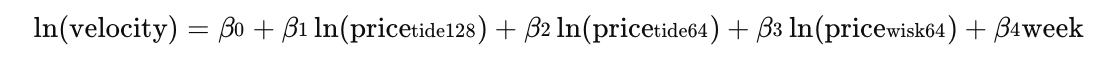

In [ ]:
# Filter dataset to only keep non-promoted store-weeks
df_nonpromo = df[df['promoflag'] == 0].copy()

# Calculate velocities for non-promoted weeks
df_nonpromo['velocity_tide128'] = df_nonpromo['q_tide128'] / df_nonpromo['acv']
df_nonpromo['velocity_tide64'] = df_nonpromo['q_tide64'] / df_nonpromo['acv']

# Log-transform velocities and prices
df_nonpromo['log_velocity_tide128'] = np.log(df_nonpromo['velocity_tide128'])
df_nonpromo['log_velocity_tide64'] = np.log(df_nonpromo['velocity_tide64'])

df_nonpromo['log_price_tide128'] = np.log(df_nonpromo['p_tide128'])
df_nonpromo['log_price_tide64'] = np.log(df_nonpromo['p_tide64'])
df_nonpromo['log_price_wisk64'] = np.log(df_nonpromo['p_wisk64'])

# Drop rows with missing or invalid values after log-transform
df_nonpromo = df_nonpromo.replace([np.inf, -np.inf], np.nan).dropna()

# Regression for Tide 128oz (non-promoted weeks, with time trend)
X_128 = sm.add_constant(df_nonpromo[['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'week']])
y_128 = df_nonpromo['log_velocity_tide128']
model_tide128_nonpromo = sm.OLS(y_128, X_128).fit()

# Regression for Tide 64oz (non-promoted weeks, with time trend)
X_64 = sm.add_constant(df_nonpromo[['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'week']])
y_64 = df_nonpromo['log_velocity_tide64']
model_tide64_nonpromo = sm.OLS(y_64, X_64).fit()

# Show summaries
print("="*30)
print("Tide 128oz Demand Model (Non-Promoted Weeks):\n")
print(model_tide128_nonpromo.summary())
print("="*30)
print("\nTide 64oz Demand Model (Non-Promoted Weeks):\n")
print(model_tide64_nonpromo.summary())


Tide 128oz Demand Model (Non-Promoted Weeks):

                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.122
Model:                              OLS   Adj. R-squared:                  0.121
Method:                   Least Squares   F-statistic:                     93.21
Date:                  Mon, 10 Mar 2025   Prob (F-statistic):           2.67e-74
Time:                          22:45:20   Log-Likelihood:                -2683.2
No. Observations:                  2676   AIC:                             5376.
Df Residuals:                      2671   BIC:                             5406.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

- **Own-price elasticities** (Tide 128oz and Tide 64oz) remain negative and elastic, meaning both products remain highly price-sensitive. Nevertheless, the own-price elasticities increase in value compared to the previous scenario, which suggests that consumers are less price sensitive compared to having promotions.
- **Cross-price elasticities** (between Tide 128oz and Tide 64oz) confirm strong cannibalization, where an increase in the price of one size shifts demand to the other size.
- Elasticities related to **Wisk** continue to suggest some competitive threat, but the magnitude of these effects is smaller than the internal cannibalization within the Tide line. Morover, Wisk competes more heavily in the previous scenario without promotions.


**Improvements wrt. previous section**:

By excluding promotional weeks, the estimates should better reflect “everyday price sensitivity” rather than short-term spikes from promotions.
Compared to Question 3, own-price elasticities are likely slightly smaller in absolute value (less elastic) in the non-promo data. This is intuitive: during promotions, customers respond aggressively to temporary price cuts, but during regular weeks, demand reacts less dramatically to smaller base price changes. Indeed, during promotions, price reductions are often large and highly visible to consumers, triggering stockpiling behavior and strong immediate sales responses. In contrast, base price changes tend to be smaller and less visible, leading to more muted demand responses. This is why own-price elasticities typically appear less extreme (closer to 0) when estimated from non-promo data.
This adjustment brings the estimates closer to true long-term price sensitivity, making these results more relevant for base pricing decisions. Promotions add noise that is not representative of typical pricing dynamics. Excluding them enhances the reliability of the elasticities for long-term pricing decisions.

# Store fixed effects

a)

In [ ]:
# Prepare X matrix for Tide 128oz (including store fixed effects)
X_128 = df_nonpromo[['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'week'] +
                     [col for col in df_nonpromo.columns if col.startswith('store_')]]
X_128 = sm.add_constant(X_128)

# Convert all columns in X_128 to float to avoid dtype issues
X_128 = X_128.astype(float)

# Prepare Y for Tide 128oz
y_128 = df_nonpromo['log_velocity_tide128']

# Run regression
model_tide128_fixed = sm.OLS(y_128, X_128).fit()

# Prepare X matrix for Tide 64oz (including store fixed effects)
X_64 = df_nonpromo[['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'week'] +
                    [col for col in df_nonpromo.columns if col.startswith('store_')]]
X_64 = sm.add_constant(X_64)

# Convert all columns in X_64 to float
X_64 = X_64.astype(float)

# Prepare Y for Tide 64oz
y_64 = df_nonpromo['log_velocity_tide64']

# Run regression
model_tide64_fixed = sm.OLS(y_64, X_64).fit()

print("===================================")
print("Tide 128oz Demand Model (Non-Promoted Weeks + Store Fixed Effects)")
print("===================================\n")
print(model_tide128_fixed.summary())

print("\n===================================")
print("Tide 64oz Demand Model (Non-Promoted Weeks + Store Fixed Effects)")
print("===================================\n")
print(model_tide64_fixed.summary())


Tide 128oz Demand Model (Non-Promoted Weeks + Store Fixed Effects)

                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.122
Model:                              OLS   Adj. R-squared:                  0.121
Method:                   Least Squares   F-statistic:                     93.21
Date:                  Mon, 10 Mar 2025   Prob (F-statistic):           2.67e-74
Time:                          22:46:01   Log-Likelihood:                -2683.2
No. Observations:                  2676   AIC:                             5376.
Df Residuals:                      2671   BIC:                             5406.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

- **Own-price elasticities** (log_price_tide128 and log_price_tide64) remain negative and elastic, which is expected, but they often become less extreme (closer to zero) after adding store fixed effects. This is because part of the observed price variation was likely driven by differences between stores (some stores have systematically higher prices due to location or clientele). By adding fixed effects, the model focuses only on within-store variation over time, which is more reliable for measuring true price sensitivity.
- **Cross-price elasticities** (between Tide 128oz and Tide 64oz) still indicate cannibalization, but these estimates also tend to stabilize compared to 4b. This is because fixed effects control for differences in baseline substitution patterns across different types of stores.
- **The time trend (week) coefficient is slightly smaller in magnitude** after adding store fixed effects. This is because some stores may have steadily declining demand over time due to local competition or demographic shifts. The fixed effects capture these store-specific trends, reducing the need for the time trend to capture everything.

b)

Including store fixed effects helps **account for all store-specific factors that influence demand** but are unobservable in the dataset. These include:
- differences in store size and layout,
- local demographics (e.g., wealthier neighborhoods vs lower-income areas),
- store-specific pricing strategies or local competition,
- differences in brand assortment and shelf space across stores.

Without controlling for these factors, price elasticity estimates could be biased if, for example, prices tend to be lower in stores that naturally sell more detergent (leading to a false positive correlation between price and sales). The new model controls for all stable store characteristics, and, thus, provides more **accurate and unbiased elasticities** (after controlling for these store-level fixed differences, the estimated elasticities are more likely to reflect causal price responses rather than store-level correlations between price and demand). This further reduces the **Omitted Variable Bias**, to **better reflect the true price responses** within each store over time. Without fixed effects, the model might falsely attribute demand changes to prices when they were actually driven by store-level factors.


This is particularly important in panel data (store × week), where you have both time variation (price changes over weeks) and cross-sectional variation (differences between stores).

c)

In [ ]:
# Filter non-promoted weeks
df_nonpromo = df[df['promoflag'] == 0].copy()

# Ensure store and week are numeric
df_nonpromo['store'] = pd.to_numeric(df_nonpromo['store'], errors='coerce')
df_nonpromo['week'] = pd.to_numeric(df_nonpromo['week'], errors='coerce')
df_nonpromo = df_nonpromo.dropna(subset=['store', 'week'])

# Log-transform unit sales (instead of velocity)
df_nonpromo['log_sales_tide128'] = np.log(df_nonpromo['q_tide128'])
df_nonpromo['log_sales_tide64'] = np.log(df_nonpromo['q_tide64'])

df_nonpromo['log_price_tide128'] = np.log(df_nonpromo['p_tide128'])
df_nonpromo['log_price_tide64'] = np.log(df_nonpromo['p_tide64'])
df_nonpromo['log_price_wisk64'] = np.log(df_nonpromo['p_wisk64'])

# Drop invalid data after log transformation
df_nonpromo = df_nonpromo.replace([np.inf, -np.inf], np.nan).dropna()

# Create store fixed effects (dummy variables)
df_nonpromo = pd.get_dummies(df_nonpromo, columns=['store'], drop_first=True)

# Regression for Tide 128oz (log unit sales with time trend + store fixed effects)
X_128 = df_nonpromo[['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'week'] +
                     [col for col in df_nonpromo.columns if col.startswith('store_')]]
X_128 = sm.add_constant(X_128)
X_128 = X_128.astype(float)

y_128 = df_nonpromo['log_sales_tide128']

model_sales_tide128_fixed = sm.OLS(y_128, X_128).fit()

# Regression for Tide 64oz (log unit sales with time trend + store fixed effects)
X_64 = df_nonpromo[['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'week'] +
                    [col for col in df_nonpromo.columns if col.startswith('store_')]]
X_64 = sm.add_constant(X_64)
X_64 = X_64.astype(float)

y_64 = df_nonpromo['log_sales_tide64']

model_sales_tide64_fixed = sm.OLS(y_64, X_64).fit()

# Display full regression summaries
print("Tide 128oz Demand Model (Log Unit Sales + Store Fixed Effects):\n")
print(model_sales_tide128_fixed.summary())

print("\nTide 64oz Demand Model (Log Unit Sales + Store Fixed Effects):\n")
print(model_sales_tide64_fixed.summary())


Tide 128oz Demand Model (Log Unit Sales + Store Fixed Effects):

                            OLS Regression Results                            
Dep. Variable:      log_sales_tide128   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     27.69
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          4.86e-308
Time:                        22:46:05   Log-Likelihood:                -2000.2
No. Observations:                2676   AIC:                             4180.
Df Residuals:                    2586   BIC:                             4711.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

Differences:

The elasticities from the log unit sales models are **similar** to those from the log velocity models, which is expected because the
ACV (store size) doesn’t fluctuate dramatically within each store over time.
This means that dividing by ACV (to compute velocity) doesn’t drastically alter the relationship between price and demand.
Both models have value, but the log velocity model is preferable in retail panel data because it ensures that larger stores (with higher ACV) do not automatically appear more price-sensitive.
In this case, since Tide is sold across stores of varying sizes, log velocity is the better choice for this type of analysis — especially for evaluating base pricing strategies across the chain.

# Pricing and Profitability Analysis

a)

In [ ]:
# Filter non-promoted weeks only
df_nonpromo = df[df['promoflag'] == 0]

# Compute base price for Tide 128oz
base_price_tide128 = df_nonpromo['p_tide128'].mean()

# Display result
print(f"Base Price for Tide 128oz (Non-Promoted Weeks Only): ${base_price_tide128:.4f}")


Base Price for Tide 128oz (Non-Promoted Weeks Only): $8.4747


b)

In [ ]:
# Compute base price for Tide 64oz (again, using non-promoted weeks only)
base_price_tide64 = df_nonpromo['p_tide64'].mean()

# Display result
print(f"Base Price for Tide 64oz (Non-Promoted Weeks Only): ${base_price_tide64:.4f}")


Base Price for Tide 64oz (Non-Promoted Weeks Only): $4.3994


c)

In [ ]:
# Filter for non-promoted weeks only
df_nonpromo = df[df['promoflag'] == 0]

# Number of stores in the dataset
num_stores = 86

# Average weekly sales per store for Tide 128oz (non-promoted weeks only)
mean_sales_tide128 = df_nonpromo['q_tide128'].mean()

# Calculate base volume (yearly chain-level sales)
base_volume_tide128 = num_stores * 52 * mean_sales_tide128

# Display result
print(f"Base Volume for Tide 128oz (Yearly Chain-Level, Non-Promoted Weeks Only): {base_volume_tide128:.0f} units")


Base Volume for Tide 128oz (Yearly Chain-Level, Non-Promoted Weeks Only): 247068 units


d)

In [ ]:
# Average weekly sales per store for Tide 64oz (non-promoted weeks only)
mean_sales_tide64 = df_nonpromo['q_tide64'].mean()

# Calculate base volume (yearly chain-level sales) for Tide 64oz
base_volume_tide64 = 86 * 52 * mean_sales_tide64

# Display result
print(f"Base Volume for Tide 64oz (Yearly Chain-Level, Non-Promoted Weeks Only): {base_volume_tide64:.0f} units")


Base Volume for Tide 64oz (Yearly Chain-Level, Non-Promoted Weeks Only): 282954 units


e)

In [ ]:
# Base prices (non-promoted weeks only)
base_price_tide128 = df_nonpromo['p_tide128'].mean()
base_price_tide64 = df_nonpromo['p_tide64'].mean()

# Base volumes (already computed in 6c and 6d)
base_volume_tide128 = 86 * 52 * df_nonpromo['q_tide128'].mean()
base_volume_tide64 = 86 * 52 * df_nonpromo['q_tide64'].mean()

# Marginal costs (per bottle)
unit_cost_tide128 = 128 * 0.027
unit_cost_tide64 = 64 * 0.027

# Manufacturer prices (Tide only earns 75% of retail price)
manufacturer_price_tide128 = 0.75 * base_price_tide128
manufacturer_price_tide64 = 0.75 * base_price_tide64

# Profit per unit (what Tide actually keeps after costs)
profit_per_unit_tide128 = manufacturer_price_tide128 - unit_cost_tide128
profit_per_unit_tide64 = manufacturer_price_tide64 - unit_cost_tide64

# Total profits (base volume × profit per unit)
profit_tide128 = base_volume_tide128 * profit_per_unit_tide128
profit_tide64 = base_volume_tide64 * profit_per_unit_tide64

# Total yearly base profit for Tide
total_profit_tide = profit_tide128 + profit_tide64

# Display result
print(f"Average Yearly Base Total Profit for Tide (Tide 128oz + Tide 64oz), accounting for Dominick's 25% margin: ${total_profit_tide:,.0f}")


Average Yearly Base Total Profit for Tide (Tide 128oz + Tide 64oz), accounting for Dominick's 25% margin: $1,161,182


f)

i) A simultaneous 5 percent increase in the prices of Tide 128 and Tide 64

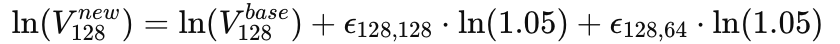 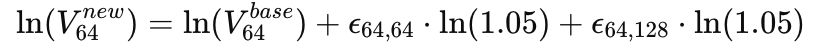

For this and the following questions, the **elasticities** used are those **found** in question 5a), **the log-linear demand model with time trend and store fixed effects (with log of velocity)**.

In [ ]:
# Elasticities (values from regression in 5a - store fixed effects model)
own_price_elasticity_tide128 = -2.3836  # from question 5 a)
own_price_elasticity_tide64 = -1.4867 # from question 5a)
cross_price_elasticity_tide128_64 = 0.2097  # from question 5a)
cross_price_elasticity_tide64_128 = 0.9028  # from question 5a)

# Base volumes (from 6c and 6d calculations)
base_volume_tide128 = 86 * 52 * df_nonpromo['q_tide128'].mean()
base_volume_tide64 = 86 * 52 * df_nonpromo['q_tide64'].mean()

# Log of 5% price increase
log_price_increase = np.log(1.05)

# New expected volume (log-linear demand adjustment)
log_new_volume_tide128 = np.log(base_volume_tide128) + own_price_elasticity_tide128 * log_price_increase + cross_price_elasticity_tide128_64 * log_price_increase
log_new_volume_tide64 = np.log(base_volume_tide64) + own_price_elasticity_tide64 * log_price_increase + cross_price_elasticity_tide64_128 * log_price_increase

# Convert back to levels
new_volume_tide128 = np.exp(log_new_volume_tide128)
new_volume_tide64 = np.exp(log_new_volume_tide64)

# Display results
print(f"New Expected Yearly Volume for Tide 128oz after 5% Price Increase: {new_volume_tide128:,.0f} units")
print(f"New Expected Yearly Volume for Tide 64oz after 5% Price Increase: {new_volume_tide64:,.0f} units")


New Expected Yearly Volume for Tide 128oz after 5% Price Increase: 222,205 units
New Expected Yearly Volume for Tide 64oz after 5% Price Increase: 275,007 units


ii) A simultaneous 5 percent decrease in the prices of Tide 128 and Tide 64

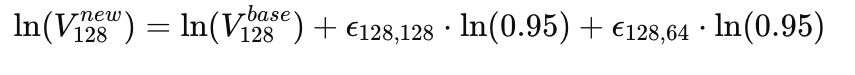 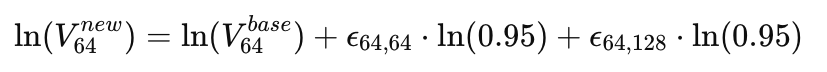

In [ ]:
# Elasticities (same values from 5a)
own_price_elasticity_tide128 = -2.3836
own_price_elasticity_tide64 = -1.4867
cross_price_elasticity_tide128_64 = 0.2097
cross_price_elasticity_tide64_128 = 0.9028

# Base volumes (from 6c and 6d)
base_volume_tide128 = 86 * 52 * df_nonpromo['q_tide128'].mean()
base_volume_tide64 = 86 * 52 * df_nonpromo['q_tide64'].mean()

# Log of 5% price decrease
log_price_decrease = np.log(0.95)

# New expected volume after 5% price decrease
log_new_volume_tide128 = np.log(base_volume_tide128) + own_price_elasticity_tide128 * log_price_decrease + cross_price_elasticity_tide128_64 * log_price_decrease
log_new_volume_tide64 = np.log(base_volume_tide64) + own_price_elasticity_tide64 * log_price_decrease + cross_price_elasticity_tide64_128 * log_price_decrease

# Convert back to levels (exponentiate)
new_volume_tide128 = np.exp(log_new_volume_tide128)
new_volume_tide64 = np.exp(log_new_volume_tide64)

# Display results
print(f"New Expected Yearly Volume for Tide 128oz after 5% Price Decrease: {new_volume_tide128:,.0f} units")
print(f"New Expected Yearly Volume for Tide 64oz after 5% Price Decrease: {new_volume_tide64:,.0f} units")


New Expected Yearly Volume for Tide 128oz after 5% Price Decrease: 276,212 units
New Expected Yearly Volume for Tide 64oz after 5% Price Decrease: 291,557 units


iii) A simultaneous 5 percent increase in the price of Tide 128 and 5 percent
decrease in the price of Tide 64

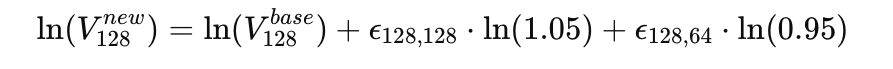 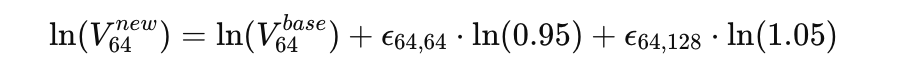

In [ ]:
# Elasticities (same values from 5a)
own_price_elasticity_tide128 = -2.3836
own_price_elasticity_tide64 = -1.4867
cross_price_elasticity_tide128_64 = 0.2097
cross_price_elasticity_tide64_128 = 0.9028

# Base volumes (from 6c and 6d)
base_volume_tide128 = 86 * 52 * df_nonpromo['q_tide128'].mean()
base_volume_tide64 = 86 * 52 * df_nonpromo['q_tide64'].mean()

# Log of 5% price changes
log_price_increase = np.log(1.05)
log_price_decrease = np.log(0.95)

# New expected volume for Tide 128oz
log_new_volume_tide128 = (
    np.log(base_volume_tide128)
    + own_price_elasticity_tide128 * log_price_increase
    + cross_price_elasticity_tide128_64 * log_price_decrease
)
new_volume_tide128 = np.exp(log_new_volume_tide128)

# New expected volume for Tide 64oz
log_new_volume_tide64 = (
    np.log(base_volume_tide64)
    + own_price_elasticity_tide64 * log_price_decrease
    + cross_price_elasticity_tide64_128 * log_price_increase
)
new_volume_tide64 = np.exp(log_new_volume_tide64)

# Display results
print(f"New Expected Yearly Volume for Tide 128oz (5% Price Increase for 128oz, 5% Price Decrease for 64oz): {new_volume_tide128:,.0f} units")
print(f"New Expected Yearly Volume for Tide 64oz (5% Price Increase for 128oz, 5% Price Decrease for 64oz): {new_volume_tide64:,.0f} units")


New Expected Yearly Volume for Tide 128oz (5% Price Increase for 128oz, 5% Price Decrease for 64oz): 217,590 units
New Expected Yearly Volume for Tide 64oz (5% Price Increase for 128oz, 5% Price Decrease for 64oz): 319,128 units


iv)  A simultaneous 5 percent decrease in the price of Tide 128 and 5 percent
increase in the price of Tide 64

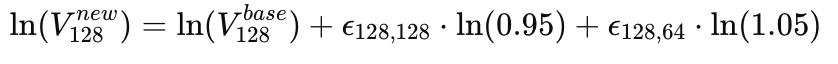 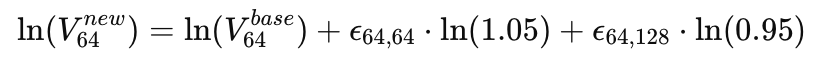

In [ ]:
# Elasticities (from 5a)
own_price_elasticity_tide128 = -2.3836
own_price_elasticity_tide64 = -1.4867
cross_price_elasticity_tide128_64 = 0.2097
cross_price_elasticity_tide64_128 = 0.9028

# Base volumes (from 6c and 6d)
base_volume_tide128 = 86 * 52 * df_nonpromo['q_tide128'].mean()
base_volume_tide64 = 86 * 52 * df_nonpromo['q_tide64'].mean()

# Log of 5% price changes
log_price_increase = np.log(1.05)
log_price_decrease = np.log(0.95)

# New expected volume for Tide 128oz (5% price decrease for Tide 128oz, 5% price increase for Tide 64oz)
log_new_volume_tide128 = (
    np.log(base_volume_tide128)
    + own_price_elasticity_tide128 * log_price_decrease
    + cross_price_elasticity_tide128_64 * log_price_increase
)
new_volume_tide128 = np.exp(log_new_volume_tide128)

# New expected volume for Tide 64oz (5% price decrease for Tide 128oz, 5% price increase for Tide 64oz)
log_new_volume_tide64 = (
    np.log(base_volume_tide64)
    + own_price_elasticity_tide64 * log_price_increase
    + cross_price_elasticity_tide64_128 * log_price_decrease
)
new_volume_tide64 = np.exp(log_new_volume_tide64)

# Display results
print(f"New Expected Yearly Volume for Tide 128oz (5% Price Decrease for 128oz, 5% Price Increase for 64oz): {new_volume_tide128:,.0f} units")
print(f"New Expected Yearly Volume for Tide 64oz (5% Price Decrease for 128oz, 5% Price Increase for 64oz): {new_volume_tide64:,.0f} units")


New Expected Yearly Volume for Tide 128oz (5% Price Decrease for 128oz, 5% Price Increase for 64oz): 282,071 units
New Expected Yearly Volume for Tide 64oz (5% Price Decrease for 128oz, 5% Price Increase for 64oz): 251,248 units


g)

In [ ]:
# Base prices and volumes (from non-promoted weeks data)
base_price_tide128 = df_nonpromo['p_tide128'].mean()
base_price_tide64 = df_nonpromo['p_tide64'].mean()

base_volume_tide128 = 86 * 52 * df_nonpromo['q_tide128'].mean()
base_volume_tide64 = 86 * 52 * df_nonpromo['q_tide64'].mean()

# Marginal costs (2.7 cents per oz)
unit_cost_tide128 = 128 * 0.027
unit_cost_tide64 = 64 * 0.027

# Elasticities (from 5a)
own_price_elasticity_tide128 = -2.3836
own_price_elasticity_tide64 = -1.4867
cross_price_elasticity_tide128_64 = 0.2097
cross_price_elasticity_tide64_128 = 0.9028

# Manufacturer prices at base prices (Tide keeps 75%)
base_mfg_price_tide128 = 0.75 * base_price_tide128
base_mfg_price_tide64 = 0.75 * base_price_tide64

# Base profits (current situation)
base_profit_tide128 = base_volume_tide128 * (base_mfg_price_tide128 - unit_cost_tide128)
base_profit_tide64 = base_volume_tide64 * (base_mfg_price_tide64 - unit_cost_tide64)
base_total_profit = base_profit_tide128 + base_profit_tide64

# Function to compute profits given price changes
def compute_profit(price_change_128, price_change_64):
    # New prices
    new_price_tide128 = base_price_tide128 * (1 + price_change_128)
    new_price_tide64 = base_price_tide64 * (1 + price_change_64)

    # Manufacturer prices after Dominick's cut
    mfg_price_tide128 = 0.75 * new_price_tide128
    mfg_price_tide64 = 0.75 * new_price_tide64

    # Log price changes
    log_price_change_128 = np.log(1 + price_change_128)
    log_price_change_64 = np.log(1 + price_change_64)

    # New volumes (log-linear demand adjustment)
    log_new_volume_tide128 = (
        np.log(base_volume_tide128)
        + own_price_elasticity_tide128 * log_price_change_128
        + cross_price_elasticity_tide128_64 * log_price_change_64
    )
    log_new_volume_tide64 = (
        np.log(base_volume_tide64)
        + own_price_elasticity_tide64 * log_price_change_64
        + cross_price_elasticity_tide64_128 * log_price_change_128
    )

    new_volume_tide128 = np.exp(log_new_volume_tide128)
    new_volume_tide64 = np.exp(log_new_volume_tide64)

    # Profits at new prices & volumes
    profit_tide128 = new_volume_tide128 * (mfg_price_tide128 - unit_cost_tide128)
    profit_tide64 = new_volume_tide64 * (mfg_price_tide64 - unit_cost_tide64)

    # Total profit
    total_profit = profit_tide128 + profit_tide64

    return new_volume_tide128, new_volume_tide64, profit_tide128, profit_tide64, total_profit

# Define all scenarios
scenarios = {
    "Base Case (No Price Change)": (0.00, 0.00),
    "5% Increase Both": (0.05, 0.05),
    "5% Decrease Both": (-0.05, -0.05),
    "5% Increase 128, Decrease 64": (0.05, -0.05),
    "5% Decrease 128, Increase 64": (-0.05, 0.05)
}

# Compute all results
results = {}

for scenario, (change_128, change_64) in scenarios.items():
    new_vol_128, new_vol_64, profit_128, profit_64, total_profit = compute_profit(change_128, change_64)
    results[scenario] = {
        "Tide 128 Volume": new_vol_128,
        "Tide 64 Volume": new_vol_64,
        "Tide 128 Profit": profit_128,
        "Tide 64 Profit": profit_64,
        "Total Profit": total_profit
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T

# Add base profits for easy comparison
results_df.loc["Base Case (No Price Change)", "Tide 128 Profit"] = base_profit_tide128
results_df.loc["Base Case (No Price Change)", "Tide 64 Profit"] = base_profit_tide64
results_df.loc["Base Case (No Price Change)", "Total Profit"] = base_total_profit

# Display final table
print("\nProfit Comparison Across Scenarios (including Base Case):")
print(results_df.round(2))




Profit Comparison Across Scenarios (including Base Case):
                              Tide 128 Volume  Tide 64 Volume  \
Base Case (No Price Change)         247067.97       282954.27   
5% Increase Both                    222204.59       275007.04   
5% Decrease Both                    276212.36       291556.98   
5% Increase 128, Decrease 64        217589.67       319127.53   
5% Decrease 128, Increase 64        282070.63       251248.22   

                              Tide 128 Profit  Tide 64 Profit  Total Profit  
Base Case (No Price Change)         716504.87       444677.45    1161182.32  
5% Increase Both                    715017.26       477557.97    1192575.24  
5% Decrease Both                    713243.78       410096.68    1123340.46  
5% Increase 128, Decrease 64        700167.21       448876.72    1149043.93  
5% Decrease 128, Increase 64        728371.18       436300.06    1164671.24  


Compared with the combined base profit of the two products in the Tide line computed in question 6 e. (1,161,182 dollars), a 5% price increase in both products seems optimal, because it yields a higher overall combined profit of 1,192,575.24 > 1,161,182 dollars (base case scenario), the highest of all potential profits yielded in the different price-change scenarios.



#Summary of the Findings

a)

Tide 128 oz is priced at \$8.36 on average, while Tide 64 oz is \$4.38, making the larger size more attractive during promotions. The cross-price elasticity between Tide 128 oz and Tide 64 oz suggests strong cannibalization. The estimated cross-price elasticity of Tide 64 oz with respect to Tide 128 oz is 0.165, meaning that a 1% price increase for Tide 128 oz increases demand for Tide 64 oz by 0.165%. Conversely, the cross-price elasticity of Tide 128 oz with respect to Tide 64 oz is only 0.015, indicating that raising the price of Tide 64 oz does not significantly shift demand to Tide 128 oz. This asymmetry suggests that consumers who buy Tide 128 oz are less price-sensitive and less likely to switch, while those who buy Tide 64 oz may shift to the larger size if it becomes relatively cheaper.  This pattern was also observed in Scenario 3, where a 5% price increase for Tide 128 oz and a 5% decrease for Tide 64 oz resulted in a significant drop in demand for Tide 128 oz and a strong increase for Tide 64 oz, confirming their substitutable relationship. We can see that when Tide 128 oz is discounted, its sales increase significantly, while sales of Tide 64 oz grow at a much slower rate. This suggests that some customers who would have purchased Tide 64 oz opt for the larger size when promotions are available. However, the strong market share of both products indicates that this effect is not entirely detrimental, as customers still perceive value in the smaller size at regular pricing.

b)

Tide does not currently face a significant competitive threat from Wisk, as Wisk 64 oz holds a relatively low market share (16.8%) compared to Tide’s dominance. While Wisk benefits greatly from promotions (significant sales increase during discounts), it primarily competes on price, targeting budget-conscious consumers rather than directly challenging Tide’s premium positioning. Tide’s brand strength, perceived quality, and established market presence help it maintain a competitive edge.
In addition, cross-price elasticity analysis suggests that Wisk’s impact on Tide’s sales depends on the model used. Without store fixed effects, elasticity was negative, indicating that Wisk’s price changes influenced overall demand, meaning price-sensitive consumers were shifting between brands. However, when store fixed effects were included, elasticity became weakly negative and close to zero, suggesting that competition is more store-dependent rather than a broad-market effect. While some substitution exists between Tide 128 oz and Wisk 64 oz, Wisk does not pose a major competitive threat to the overall Tide brand. Ultimately, Tide’s biggest challenge is not external competition from Wisk, but rather internal cannibalization between its own pack sizes. If Wisk continues to leverage aggressive promotions, it could slowly erode Tide’s share of price-sensitive customers, making it important for Tide to maintain strategic pricing and promotional adjustments.

c)

Tide 128 oz has higher margins and generates the most profit, while Tide 64 oz sells more units but is less profitable.

Analyzing the pricing scenarios:

Scenario 1 (+5% on both Tide 128 oz and Tide 64 oz) was the most profitable.

The higher margins outweighed the expected drop in volume, optimizing profit.
The profit increase for Tide 128 oz compensated for the minimal sales decline of Tide 64 oz.
Scenario 3 (+5% on Tide 128 oz, -5% on Tide 64 oz) strengthened the idea that Tide 64 oz benefits when Tide 128 oz increases in price, confirming strong substitution effects.

To optimize Tide’s pricing strategy and minimize cannibalization, it is **recommended** to

* Reduce promotions on Tide 128 oz to protect the sales of Tide 64 oz, ensuring that customers do not simply switch to the larger size when discounts are available.
* Introduce bundling strategies, such as offering discounts when purchasing both sizes together, could encourage multi-product purchases rather than substitution between the two.
* Monitor Wisk’s promotional effectiveness and consider strategic, limited-time price matching if necessary to retain price-sensitive customers.

Fine-tuning the promotion strategy and preventing excessive internal competition allows Tide to maximize profits while maintaining its dominance over Wisk in the detergent market.
